Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils1
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

[[ -9.99707031e-01  -2.92968750e-04]]


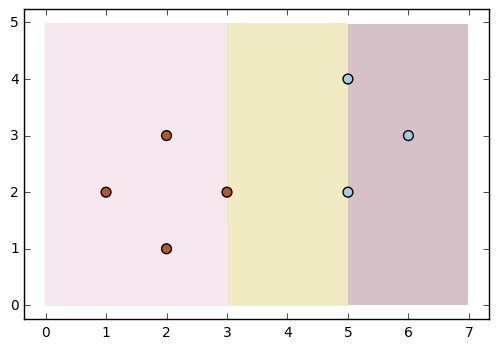

In [2]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

svc = SVC(kernel = 'linear')
svc.fit(seven_X, seven_y)
print svc.coef_
mlutils1.plot_2d_svc_problem(seven_X, seven_y, svc)

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [15]:
from sklearn.metrics import hinge_loss

def hinge(model, x, y):
    return max(0, 1-model.decision_function([x])*y)

print "Gubitak za (3,2) je "+str(hinge(svc, (3, 2), 1))
print "Gubitak za (3.5,2) je "+str(hinge(svc, (3.5, 2), 1))
print "Gubitak za (4,2) je "+str(hinge(svc, (4, 2), -1))

sv = 0
for w in svc.support_vectors_:
    sv = sv + sqrt(w[1]*w[1]+w[0]*w[0])

loss = 0
for i in range(0, len(seven_X)):
    loss = loss + hinge(svc, seven_X[i], seven_y[i])

print loss[0]
print hinge_loss(seven_y, svc.decision_function(seven_X))

Gubitak za (3,2) je [ 0.00019531]
Gubitak za (3.5,2) je [ 0.50004883]
Gubitak za (4,2) je [ 1.00009766]
0.0005859375
8.37053571429e-05


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [4]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

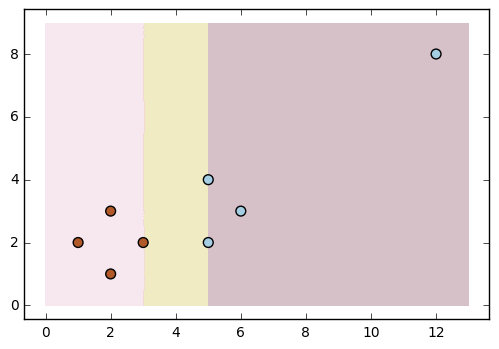

In [5]:
# Vaš kôd ovdje...
svc = SVC(kernel = 'linear')
svc.fit(outlier_X, outlier_y)
mlutils1.plot_2d_svc_problem(outlier_X, outlier_y, svc)

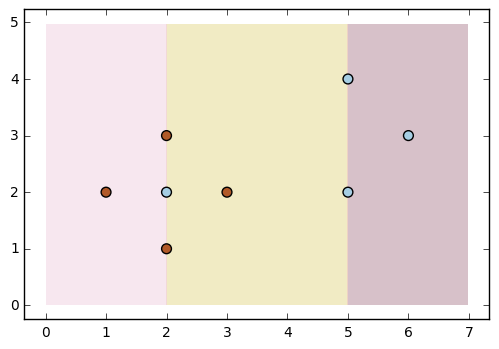

In [6]:
svc = SVC(kernel = 'linear')
svc.fit(unsep_X, unsep_y)
mlutils1.plot_2d_svc_problem(unsep_X, unsep_y, svc)

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

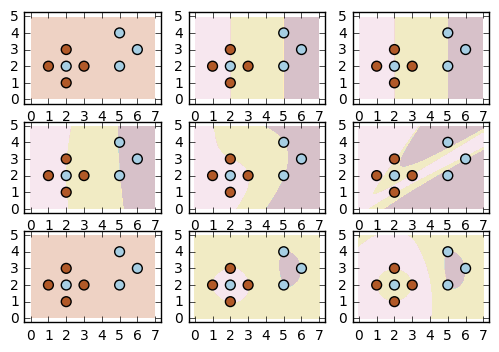

In [7]:
# Vaš kôd ovdje...
fig,ax = plt.subplots(3,3)

kernel = ['linear', 'poly', 'rbf']
C = [10**-2, 1, 10**2]

for i in range(0,3):
    for j in range(0,3):
        svc = SVC(kernel = kernel[i], C = C[j])
        svc.fit(unsep_X, unsep_y)
        #ax[i, j] = mlutils1.plot_2d_svc_problem(unsep_X, unsep_y, svc)
        #ax[i, j].set_title(kernel + ", C= " + str(C))
        plt.axes(ax[i, j])
        mlutils1.plot_2d_svc_problem(unsep_X, unsep_y, svc)
plt.show()

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [262]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    if((c2<c1) or (g2<g1)):
        return 0
    cpot = c1
    ypot = g1
    
    copt = cpot
    yopt = ypot
    lossOpt = 99999999
    
    gridTrain = np.ndarray(shape = (c2-c1+1, g2-g1+1))
    gridTest = np.ndarray(shape = (c2-c1+1, g2-g1+1))
    
    i = 0
    
    while(cpot <= c2):
        j = 0
        ypot = g1
        while(ypot <= g2):
            svc = SVC(C = 2**cpot, gamma = 2**ypot)
            svc.fit(X_train, y_train)
            lossTrain = zero_one_loss(y_train, svc.predict(X_train))
            lossValidate = zero_one_loss(y_validate, svc.predict(X_validate))
            loss = lossTrain + lossValidate
            gridTrain[i, j] = lossTrain
            gridTest[i, j] = lossValidate
            if(loss < lossOpt):
                copt = cpot
                yopt = ypot
                lossOpt = loss
                
            ypot = ypot + 1
            j = j + 1
        cpot = cpot + 1
        i = i +1
    
    if(error_surface):
        return [2**copt, 2**yopt, gridTrain, gridTest]
    else:
        return (2**copt, 2**yopt)

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

C* 2 dimenzije: 4
gamma* 2 dimenzije: 2


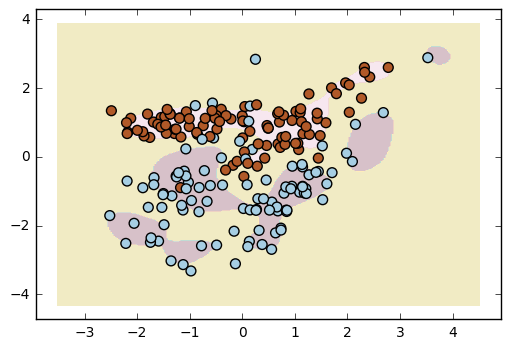

C* 100 dimenzija: 1
gamma* 100 dimenzija: 0.0078125


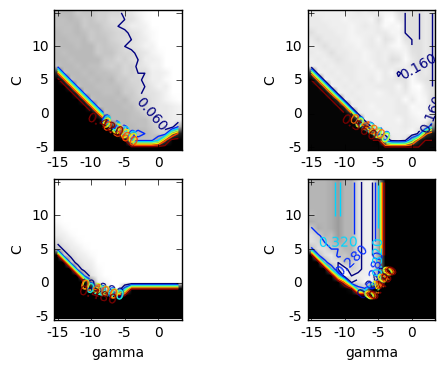

In [275]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

(dim2_X, dim2_y) = make_classification(n_samples = 200, n_features = 2, n_redundant = 0, n_classes = 2, n_clusters_per_class = 2)
(dim100_X, dim100_y) = make_classification(n_samples = 200, n_features = 100, n_redundant = 0, n_classes = 2, n_clusters_per_class = 2)

dim2_X_train, dim2_X_test, dim2_y_train, dim2_y_test = train_test_split(dim2_X, dim2_y, test_size=0.5, random_state=33)
dim100_X_train, dim100_X_test, dim100_y_train, dim100_y_test = train_test_split(dim100_X, dim100_y, test_size=0.5, random_state=33)

Cstar, ystar, gridTrain2, gridTest2 = grid_search(dim2_X_train, dim2_X_test, dim2_y_train, dim2_y_test, (-5,15), (-15,3), error_surface=True)
print "C* 2 dimenzije: " + str(Cstar)
print "gamma* 2 dimenzije: " + str(ystar)

svc = SVC(C = Cstar, gamma = ystar)
svc.fit(dim2_X_train, dim2_y_train)
mlutils1.plot_2d_svc_problem(dim2_X, dim2_y, svc)
plt.show()

Cstar, ystar, gridTrain100, gridTest100 = grid_search(dim100_X_train, dim100_X_test, dim100_y_train, dim100_y_test, (-5,15), (-15,3), error_surface=True)
print "C* 100 dimenzija: " + str(Cstar)
print "gamma* 100 dimenzija: " + str(ystar)

fig,ax = plt.subplots(2,2)
graph = [(0, 0), (0, 1), (1, 0), (1, 1)]
grid = [gridTrain2, gridTest2, gridTrain100, gridTest100]
for i in range(0, 4):
    plt.axes(ax[graph[i]])
    mlutils1.plot_error_surface(grid[i], (-5,15), (-15,3))
plt.show()

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

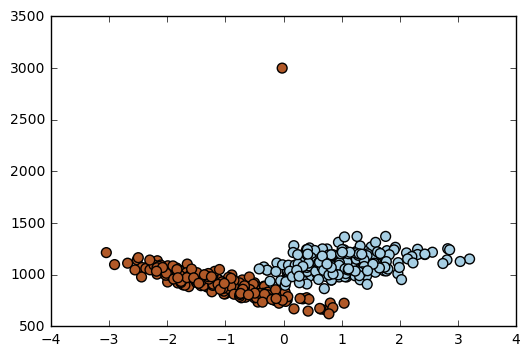

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils1.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

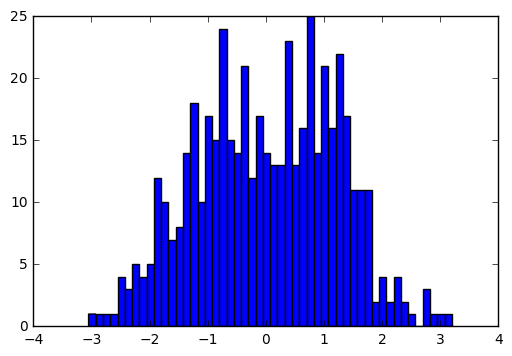

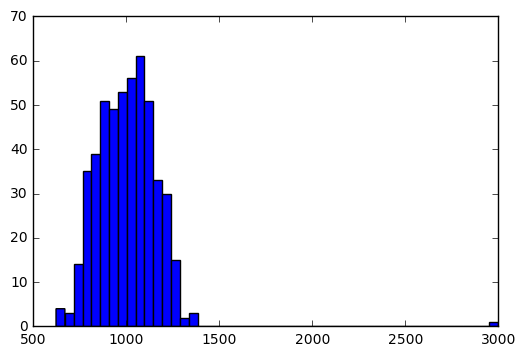

In [20]:
# Vaš kôd ovdje...
plt.hist(X[:,0], bins = 50)
plt.show()
plt.hist(X[:,1], bins = 50)
plt.show()

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

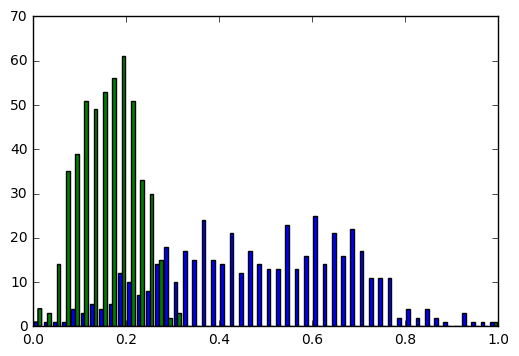

In [22]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#scaler.fit(X[:,0])
#plt.hist(scaler.transform(X[:,0]), bins = 50)
#plt.show()
#scaler = MinMaxScaler()
#scaler.fit(X[:,1])
#plt.hist(scaler.transform(X[:,1]), bins = 50)
#plt.show()

scaler = MinMaxScaler()
scaler.fit(X)
plt.hist(scaler.transform(X), bins = 50)
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

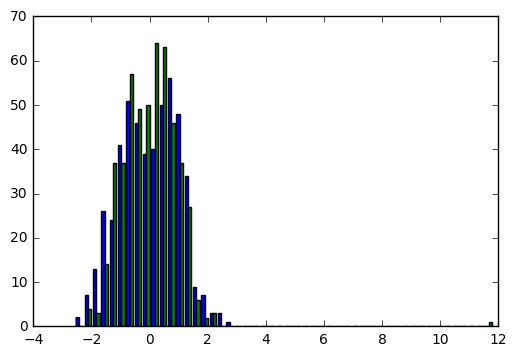

In [23]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X[:,0])
#plt.hist(scaler.fit_transform(X[:,0]), bins = 50)
#plt.show()
#scaler = StandardScaler()
#scaler.fit(X[:,1])
#plt.hist(scaler.fit_transform(X[:,1]), bins = 50)
#plt.show()

scaler = StandardScaler()
scaler.fit(X)
plt.hist(scaler.transform(X), bins = 50)
plt.show()

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [47]:
from sklearn import cross_validation

neskalErrTest = 0
standErrTest = 0
minmaxErrTest = 0

neskalErrTrain = 0
standErrTrain = 0
minmaxErrTrain = 0

for i in range(0, 30):  
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)
    
    svc = SVC(kernel = 'rbf')
    svc.fit(X_train, y_train)
    neskalErrTrain = neskalErrTrain + accuracy_score(y_train, svc.predict(X_train), normalize=True)
    neskalErrTest = neskalErrTest + accuracy_score(y_test, svc.predict(X_test), normalize=True)
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    svc = SVC(kernel = 'rbf')
    svc.fit(scaler.transform(X_train), y_train)
    minmaxErrTrain = minmaxErrTrain + accuracy_score(y_train, svc.predict(scaler.transform(X_train)), normalize=True)
    minmaxErrTest = minmaxErrTest + accuracy_score(y_test, svc.predict(scaler.transform(X_test)), normalize=True)

    scaler = StandardScaler()
    scaler.fit(X_train)
    svc = SVC(kernel = 'rbf')
    svc.fit(scaler.transform(X_train), y_train)
    standErrTrain = standErrTrain + accuracy_score(y_train, svc.predict(scaler.transform(X_train)), normalize=True)
    standErrTest = standErrTest + accuracy_score(y_test, svc.predict(scaler.transform(X_test)), normalize=True)
    
print "Neskalirani train " + str(neskalErrTrain*1.0/30)
print "Standardni train " + str(standErrTrain*1.0/30)
print "Min-max train " + str(minmaxErrTrain*1.0/30)
    
print "Neskalirani test " + str(neskalErrTest*1.0/30)
print "Stnandardni test " + str(standErrTest*1.0/30)
print "Min-max test " + str(minmaxErrTest*1.0/30)

Neskalirani train 0.997733333333
Standardni train 0.993333333333
Min-max train 0.966533333333
Neskalirani test 0.833733333333
Stnandardni test 0.992
Min-max test 0.974933333333


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [150]:
from scipy.linalg import norm
from bisect import insort

class KNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_test = []
        for x in X_test:
            nn = []
            for i in range(0, self.n_neighbors):
                nn.append((-1, float('inf')))
            for i in range(0, len(self.X_train)):
                #if((x == self.X_train[i])).all():
                #    continue
                dist = norm(x-self.X_train[i])
                if(dist < nn[self.n_neighbors-1][1]):
                    for j in range(0, self.n_neighbors):
                        if(dist < (nn[j])[1]):
                            del nn[self.n_neighbors-1]
                            nn.insert(j, (i, dist))
                            break
            null = 0
            one = 0
            for val in nn:
                if(self.y_train[val[0]]==0):
                    null = null + 1
                else:
                    one = one + 1
            if(null > one):
                y_test.append(0)
            elif(one > null):
                y_test.append(1)
            else:
                y_test.append((nn[0])[1])
        return y_test

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

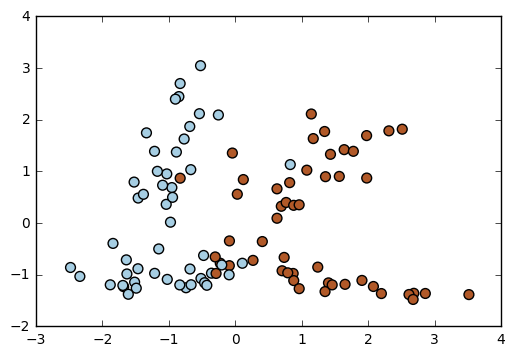

In [158]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils1.plot_2d_clf_problem(X_art, y_art)

#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

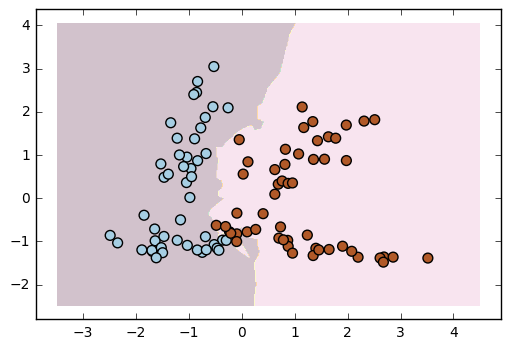

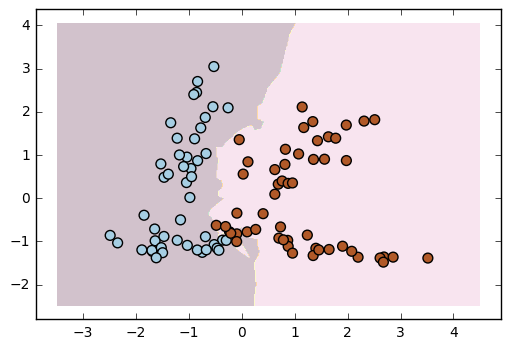

In [159]:
# Vaš kôd ovdje...
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=3

knn_my = KNN(n_neighbors = n_neighbors)
knn_my.fit(X_art, y_art)
knn_py = KNeighborsClassifier(n_neighbors = n_neighbors, algorithm='brute')
knn_py.fit(X_art, y_art)

mlutils1.plot_2d_clf_problem(X_art, knn_my.predict(X_art), knn_py.predict)
plt.show()
mlutils1.plot_2d_clf_problem(X_art, knn_py.predict(X_art), knn_py.predict)
plt.show()

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [240]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    
    kopt = k_range[0]
    corrOpt = 0
    train_errors = []
    test_errors = []
    for k in range(k_range[0], k_range[1]):
        corrTest = 0
        corrTrain = 0
        trainn = 0
        testn = 0
        for i in range(0, n_trials):
            X, y = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative = n_informative, n_redundant=0, n_clusters_per_class=2)
            X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=test_size)
            trainn = len(y_train)
            testn = len(y_test)
            knn = KNeighborsClassifier(n_neighbors = k)
            knn.fit(X_train, y_train)
            corrTrain = corrTrain + accuracy_score(y_train, knn.predict(X_train), normalize=False)
            corrTest = corrTest + accuracy_score(y_test, knn.predict(X_test), normalize=False)
        if(corrOpt < corrTest):
            kopt = k
            corrOpt = corrTest
        train_errors.append(corrTrain*1.0/trainn)
        test_errors.append(corrTest*1.0/testn)
    return (kopt, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

Optimalni k je 6


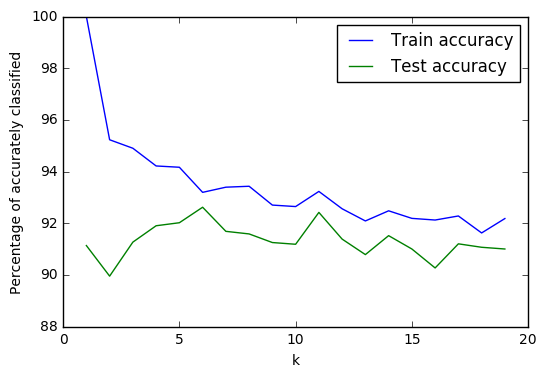

In [243]:
ret = knn_eval(n_instances=200)
print "Optimalni k je " + str(ret[0])
plt.plot(range(1, 20), ret[1], label="Train accuracy")
plt.plot(range(1, 20), ret[2], label="Test accuracy")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Percentage of accurately classified')
plt.show()

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

Optimalni k za N = 100 je 3
Optimalni k za N = 500 je 9
Optimalni k za N = 1000 je 12
Optimalni k za N = 3000 je 9


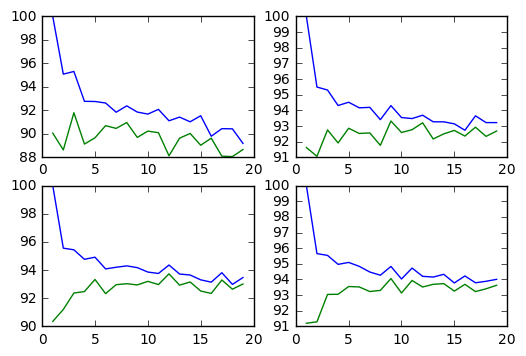

In [234]:
subplt = 0
fig,ax = plt.subplots(2,2)
graph = [(0, 0), (0, 1), (1, 0), (1, 1)]
N = [100, 500, 1000, 3000]
for i in range(0, 4):
    ret = knn_eval(n_instances=N[i])
    print "Optimalni k za N = "+ str(N[i]) +" je " + str(ret[0])
    ax[graph[i]].plot(range(1, 20), ret[1], label="Train error")
    ax[graph[i]].plot(range(1, 20), ret[2], label="Test error")
plt.show()

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

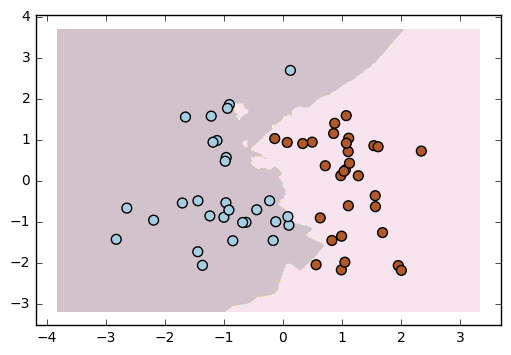

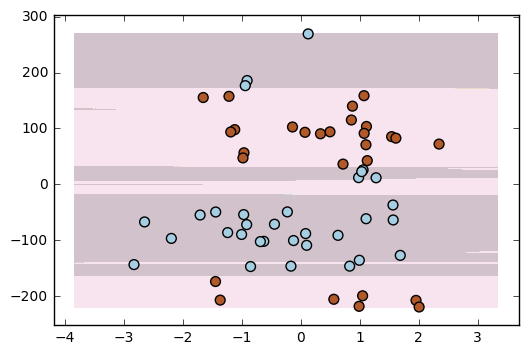

In [237]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
X_100train = deepcopy(X_train)
X_100test = deepcopy(X_test)
X_100train[:,1] = X_100train[:,1]*100
X_100test[:,1] = X_100test[:,1]*100

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mlutils1.plot_2d_clf_problem(X_test, knn.predict(X_test), knn.predict)
plt.show()

knn = KNeighborsClassifier()
knn.fit(X_100train, y_train)
mlutils1.plot_2d_clf_problem(X_100test, knn.predict(X_100test), knn.predict)
plt.show()

**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

Optimalni k je 5


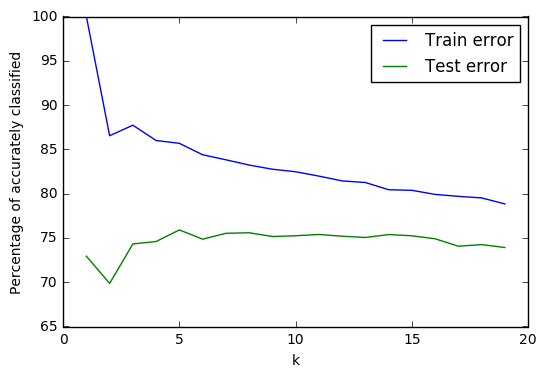

Optimalni k je 13


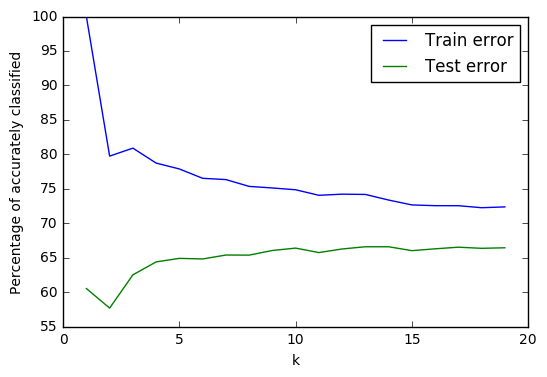

In [244]:
ret = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=10, test_size=0.3, k_range=(1, 20), n_trials=100)
print "Optimalni k je " + str(ret[0])
plt.plot(range(1, 20), ret[1], label="Train error")
plt.plot(range(1, 20), ret[2], label="Test error")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Percentage of accurately classified')
plt.show()

ret = knn_eval(n_instances=1000, n_features=10, n_classes=5, n_informative=5, test_size=0.3, k_range=(1, 20), n_trials=100)
print "Optimalni k je " + str(ret[0])
plt.plot(range(1, 20), ret[1], label="Train error")
plt.plot(range(1, 20), ret[2], label="Test error")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Percentage of accurately classified')
plt.show()

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?